# KITTI: Change color of a car

In [7]:
from PIL import Image
import numpy as np
from IPython.display import display
from PIL import ImageEnhance
import torch
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils
import matplotlib.pyplot as plt

from tools import image_utils
from CarStyleGAN.KittiDataset import KittiDataset

DATASET = "../../dataset/kitti_data_semantics/training"
EXAMPLE_FRAME = "000045_10"  # contains 2 cars
semantic_label_car = 26  # car

# Torch config
# Number of workers for dataloader
workers = 0
# Batch size during training
batch_size = 8
# Spatial size of training images. All images will be resized to this
#   size using a transformer.
image_size = 256
# Number of channels in the training images. For color images this is 3
nc = 3
# Size of z latent vector (i.e. size of generator input)
nz = 100
# Size of feature maps in generator
ngf = 64
# Size of feature maps in discriminator
ndf = 64
# Number of training epochs
num_epochs = 150
# Learning rate for optimizers
lr = 0.0002
# Beta1 hyperparam for Adam optimizers
beta1 = 0.5
# Number of GPUs available. Use 0 for CPU mode.
ngpu = 1

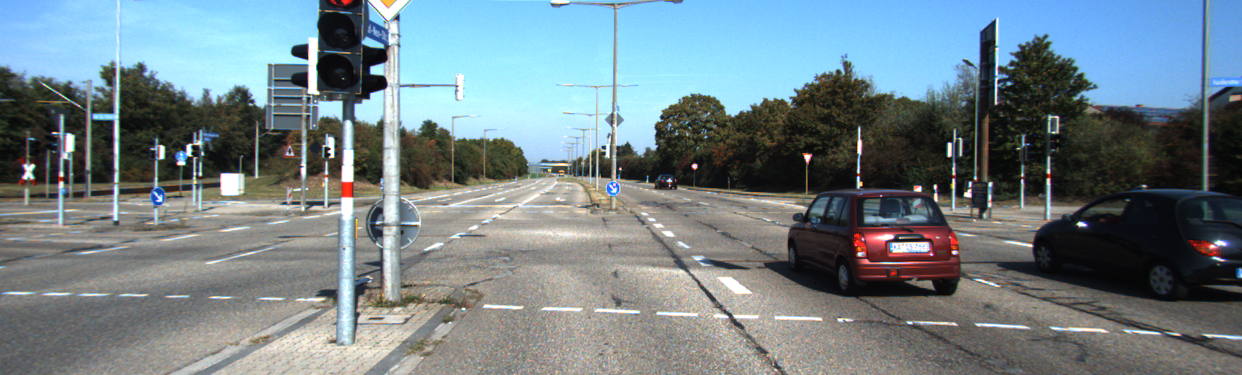

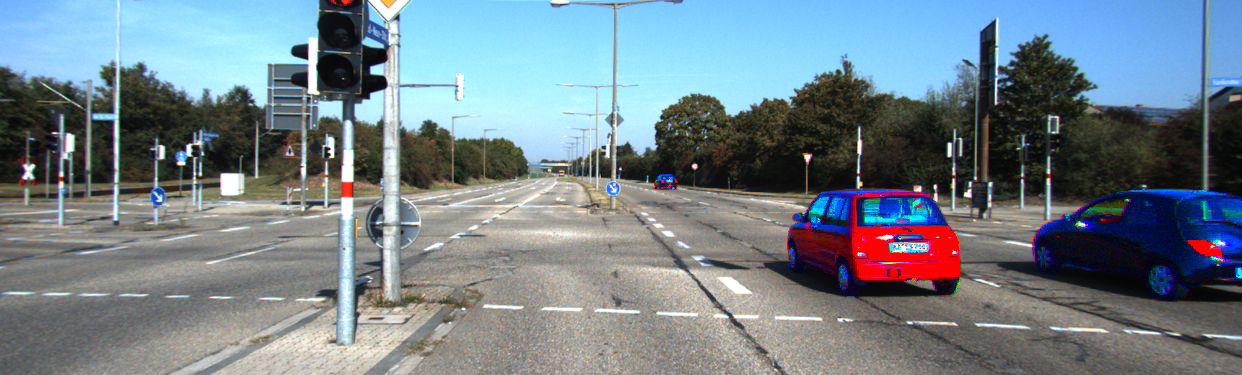

'\nplt.figure(figsize=(8, 8))\nplt.axis("off")\nplt.title("Training Images")\nplt.imshow(np.transpose(vutils.make_grid(real_batch[0].to(device)[:64], padding=2, normalize=True).cpu(), (1, 2, 0)))\nplt.show()\n'

In [8]:
import torch
import os
from torchvision.io import read_image
import torchvision.transforms.functional as F

dataset = KittiDataset(root=DATASET,
                       transforms=transforms.Compose([
                           #transforms.Resize(image_size),
                           transforms.CenterCrop((375, 1242)),
                           transforms.ToTensor(),
                           #transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                       ]),
                       img_root='image_2',
                       mask_root='semantic')

# Create the dataloader
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                         shuffle=True, num_workers=workers)

# Decide which device we want to run on
device = torch.device("cuda:0" if (torch.cuda.is_available() and ngpu > 0) else "cpu")

# Plot some training images
real_batch = next(iter(dataloader))
for i in range(len(real_batch[0])):
    display(transforms.ToPILImage()(real_batch[0][i]))
    display(transforms.ToPILImage()(real_batch[1][i]))
    break
"""
plt.figure(figsize=(8, 8))
plt.axis("off")
plt.title("Training Images")
plt.imshow(np.transpose(vutils.make_grid(real_batch[0].to(device)[:64], padding=2, normalize=True).cpu(), (1, 2, 0)))
plt.show()
"""